Importing libraries

In [21]:
library(Seurat)
library(Signac)
library(BuenColors)
library(data.table)
library(dplyr)
library(stringr)
library(ggpubr)
library(ggpointdensity)

In [2]:
JAN_028_wnn=readRDS("~/github_reproducibility/JAN_028_common_processed_object_with_wnn.RDS")

Importing the differential accessibility analysis

In [22]:
combined_DAP_JAN_028_ATAC=fread("~/github_reproducibility/table_S2.csv")
combined_DAP_JAN_028_ATAC

gene_ID,log2FC,beta_weight,p_weight,DE_method,perturbation_name
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
chr5-168813327-168814237,-0.1551455762,0.14598774,1.310966e-08,weighted,ATF4
chr11-75534415-75535556,-0.0556321838,0.10356670,1.366742e-08,weighted,ATF4
chrY-19737481-19738387,-0.3430427632,0.25171182,8.015469e-08,weighted,ATF4
chr11-12144313-12145139,-0.4274194895,0.51551922,9.063898e-08,weighted,ATF4
chr1-1662674-1663732,-0.2679524600,0.44251875,3.788976e-07,weighted,ATF4
chr17-38460042-38460983,-0.1128915425,0.14173748,4.048471e-07,weighted,ATF4
chr12-122646503-122647464,0.5055150405,-0.47408388,4.455725e-07,weighted,ATF4
chr3-53129071-53129914,-0.2514135976,0.13136462,4.607300e-07,weighted,ATF4
chr5-59039023-59040027,0.0986940827,-0.22717895,5.445509e-07,weighted,ATF4


Import TF-sensitive elements

In [ ]:
combined_DAP_JAN_028_RNA=fread("~/github_reproducibility/table_S3.csv")

In [9]:
DefaultAssay(JAN_028_wnn)='ATAC'

Importing the object from 
perturb_multiome/TF_sensitive_element_computation
/GITHUB_TF_sensitive_element_computation.ipynb

In [10]:
seurat_obj_mixscale_separate_guides_AAVS1_1_reference_RNA=readRDS("~/github_reproducibility/seurat_obj_mixscale_separate_guides_AAVS1_1_reference_ATAC.RDS")

In [11]:
seurat_obj_mixscale_separate_guides_AAVS1_1_reference_ATAC=readRDS("~/github_reproducibility/seurat_obj_mixscale_separate_guides_AAVS1_1_reference_ATAC.RDS")



In [14]:
JAN_028_wnn_with_module=JAN_028_wnn

In [49]:
JAN_028_wnn_with_module@meta.data$perturbation_name=seurat_obj_mixscale_separate_guides_AAVS1_1_reference_ATAC@meta.data$perturbation_name
JAN_028_wnn_with_module@meta.data$mixscale_score=seurat_obj_mixscale_separate_guides_AAVS1_1_reference_ATAC@meta.data$mixscale_score




Importing correlations. These are the ouput from the WDL for correlations and figR_script_by_target.R

In [ ]:
cd ~/github_reproducibility/PER_TF_all_peaks_and_perturbations_correlation_analysis
COUNTER=1
for PADDING joinin 1 2 3 4 5 6 7 8 9 10 11; do 
    
    gsutil ls "gs://bucket_path/JAN_028/figR/ALL_TFs_all_peaks_BY_TARGET_PADDING_${PADDING}//*_correlations.csv" | while read -r srcFile; do
        baseName=$(basemname "$srcFile")
        gsutil cp "$srcFile" "{COUNTER}_
{baseName}"        
    done
    ((COUNTER++))
done

In [ ]:
setwd("~/github_reproducibility/PER_TF_all_peaks_and_perturbations_correlation_analysis")

files <- list.files(pattern = "_correlations\\.csv$")

read_and_append_filename <- function(filename) {
  df <- read.csv(filename, sep=' ')
    modified_name <- gsub("^\\d+_", "", basename(filename))
  base_name <- tools::file_path_sans_ext(gsub("_correlations", "", modified_name))
    df$target <- base_name
  return(df)
}

combined_correlations_all_tfs <- do.call(rbind, lapply(files, read_and_append_filename))

combined_correlations_all_tfs = combined_correlations_all_tfs %>%
  mutate(target_and_peak = paste0(target, "_", gsub(":", "-", PeakRanges)))


In [ ]:
fwrite(combined_correlations_all_tfs,"~/github_reproducibility/combined_correlations_all_tfs.csv")

In [21]:
GFI1B_correlations=combined_correlations_all_tfs %>%
filter(target == 'GFI1B')

In [23]:
GFI1B_DAP=combined_DAP_JAN_028_ATAC %>%
filter(perturbation_name == 'GFI1B')%>%
filter(p_weight < 0.05/230000) 


In [24]:
GFI1B_down_peaks=combined_DAP_JAN_028_ATAC%>%
filter(perturbation_name == 'GFI1B')%>%
filter(p_weight < 0.05/230000) %>%
filter(log2FC < 0) %>%
pull(gene_ID)

In [25]:
GFI1B_correlations$PeakRanges=gsub(":","-",GFI1B_correlations$PeakRanges)

In [26]:
GFI1B_DAP=GFI1B_DAP %>%
mutate(target_and_peak = paste0("GFI1B_",gene_ID))

In [27]:
GFI1B_correlations=GFI1B_correlations %>%
mutate(target_and_peak = paste0("GFI1B_",PeakRanges))

In [30]:
GFI1B_DAP_correlations=merge(GFI1B_DAP,GFI1B_correlations,by='target_and_peak')
GFI1B_DAP_correlations

target_and_peak,gene_ID,log2FC,beta_weight,p_weight,DE_method,perturbation_name,Peak,PeakRanges,Gene,rObs,pvalZ,target
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>
GFI1B_chr1-100045799-100047343,chr1-100045799-100047343,-0.49363984,0.28317206,1.683015e-07,weighted,GFI1B,14939,chr1-100045799-100047343,SNX7,-0.002413084,0.57852030,GFI1B
GFI1B_chr1-100045799-100047343,chr1-100045799-100047343,-0.49363984,0.28317206,1.683015e-07,weighted,GFI1B,14939,chr1-100045799-100047343,PALMD,-0.005913399,0.69738254,GFI1B
GFI1B_chr1-100045799-100047343,chr1-100045799-100047343,-0.49363984,0.28317206,1.683015e-07,weighted,GFI1B,14939,chr1-100045799-100047343,AGL,0.010025960,0.75633034,GFI1B
GFI1B_chr1-100045799-100047343,chr1-100045799-100047343,-0.49363984,0.28317206,1.683015e-07,weighted,GFI1B,14939,chr1-100045799-100047343,SLC35A3,0.019781919,0.67367772,GFI1B
GFI1B_chr1-100045799-100047343,chr1-100045799-100047343,-0.49363984,0.28317206,1.683015e-07,weighted,GFI1B,14939,chr1-100045799-100047343,MFSD14A,0.008549137,0.72228934,GFI1B
GFI1B_chr1-100045799-100047343,chr1-100045799-100047343,-0.49363984,0.28317206,1.683015e-07,weighted,GFI1B,14939,chr1-100045799-100047343,TRMT13,0.030485985,0.42978538,GFI1B
GFI1B_chr1-100045799-100047343,chr1-100045799-100047343,-0.49363984,0.28317206,1.683015e-07,weighted,GFI1B,14939,chr1-100045799-100047343,RTCA,0.012699145,0.69247281,GFI1B
GFI1B_chr1-100045799-100047343,chr1-100045799-100047343,-0.49363984,0.28317206,1.683015e-07,weighted,GFI1B,14939,chr1-100045799-100047343,CDC14A,0.037514400,0.34035715,GFI1B
GFI1B_chr1-100045799-100047343,chr1-100045799-100047343,-0.49363984,0.28317206,1.683015e-07,weighted,GFI1B,14939,chr1-100045799-100047343,VCAM1,-0.002413084,0.30768665,GFI1B


In [31]:
combined_DAP_JAN_028_RNA_GFI1B=combined_DAP_JAN_028_RNA %>%
filter(perturbation_name == 'GFI1B')


In [32]:
GFI1B_DAP_correlations_AND_RNA=merge(combined_DAP_JAN_028_RNA_GFI1B,GFI1B_DAP_correlations,by.x='gene_ID',
                            by.y='Gene')
GFI1B_DAP_correlations_AND_RNA

gene_ID,log2FC.x,beta_weight.x,p_weight.x,DE_method.x,perturbation_name.x,target_and_peak,gene_ID.y,log2FC.y,beta_weight.y,p_weight.y,DE_method.y,perturbation_name.y,Peak,PeakRanges,rObs,pvalZ,target
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
A1BG,-0.5973966,0.4291825,3.225163e-16,weighted,GFI1B,GFI1B_chr19-58558393-58559338,chr19-58558393-58559338,-0.027135222,-0.06782615,2.003917e-08,weighted,GFI1B,7192,chr19-58558393-58559338,-0.029430104,0.74050759,GFI1B
A1BG,-0.5973966,0.4291825,3.225163e-16,weighted,GFI1B,GFI1B_chr19-58097839-58098784,chr19-58097839-58098784,-0.220957618,0.26292745,3.788032e-27,weighted,GFI1B,6710,chr19-58097839-58098784,0.047611969,0.18405421,GFI1B
A1BG,-0.5973966,0.4291825,3.225163e-16,weighted,GFI1B,GFI1B_chr19-57279763-57280734,chr19-57279763-57280734,0.039688917,-0.08580749,3.410017e-09,weighted,GFI1B,9721,chr19-57279763-57280734,-0.018932473,0.64742121,GFI1B
A1BG,-0.5973966,0.4291825,3.225163e-16,weighted,GFI1B,GFI1B_chr19-56594884-56595784,chr19-56594884-56595784,-0.279099492,0.20170992,8.862336e-21,weighted,GFI1B,11434,chr19-56594884-56595784,0.048644363,0.11798410,GFI1B
A1BG,-0.5973966,0.4291825,3.225163e-16,weighted,GFI1B,GFI1B_chr19-58364007-58364799,chr19-58364007-58364799,-0.369931662,0.36129209,2.607949e-21,weighted,GFI1B,593,chr19-58364007-58364799,0.039783970,0.10830739,GFI1B
A1BG,-0.5973966,0.4291825,3.225163e-16,weighted,GFI1B,GFI1B_chr19-58580866-58581783,chr19-58580866-58581783,0.057699138,-0.14002238,1.199998e-07,weighted,GFI1B,9528,chr19-58580866-58581783,-0.001911476,0.69107153,GFI1B
A1BG,-0.5973966,0.4291825,3.225163e-16,weighted,GFI1B,GFI1B_chr19-58584495-58585548,chr19-58584495-58585548,0.296411387,-0.59223748,2.393352e-37,weighted,GFI1B,5072,chr19-58584495-58585548,-0.016955183,0.66272031,GFI1B
A1BG,-0.5973966,0.4291825,3.225163e-16,weighted,GFI1B,GFI1B_chr19-58058875-58059799,chr19-58058875-58059799,-0.497657813,0.34147064,3.920162e-13,weighted,GFI1B,9582,chr19-58058875-58059799,0.034126236,0.17928238,GFI1B
A1BG,-0.5973966,0.4291825,3.225163e-16,weighted,GFI1B,GFI1B_chr19-56838721-56840084,chr19-56838721-56840084,-0.309885071,0.23090858,6.676688e-15,weighted,GFI1B,610,chr19-56838721-56840084,0.053407548,0.07797493,GFI1B


In [33]:
sig_RNA=GFI1B_DAP_correlations_AND_RNA %>%
filter(p_weight.x < 0.05/23508) %>%
pull(gene_ID)

In [34]:
correlated_RNA_from_sig_ATAC=GFI1B_DAP_correlations_AND_RNA %>%
filter(p_weight.y < 0.05/230000) %>%
filter(pvalZ < 0.05) %>%
pull(gene_ID)

In [36]:
JAN_028_wnn_with_module=JAN_028_wnn

In [37]:
DefaultAssay(JAN_028_wnn_with_module)='ATAC'

In [38]:
JAN_028_wnn_with_module=AddModuleScore(JAN_028_wnn_with_module,
               list(GFI1B_down_peaks),  name = "sig_ATAC_GFI1B")


In [39]:
DefaultAssay(JAN_028_wnn_with_module)='RNA'

In [40]:
JAN_028_wnn_with_module=AddModuleScore(JAN_028_wnn_with_module,
               list(sig_RNA),  name = "sig_RNA_GFI1B")


In [ ]:
JAN_028_wnn_with_module=AddModuleScore(JAN_028_wnn_with_module,
               list(correlated_RNA_from_sig_ATAC),  name = "correlated_RNA_from_sig_ATAC_GFI1B")


In [ ]:
JAN_028_wnn_with_module@meta.data=JAN_028_wnn_with_module@meta.data%>%
mutate(zscored_correlated_RNA_from_sig_ATAC_GFI1B1=(correlated_RNA_from_sig_ATAC_GFI1B1-mean(correlated_RNA_from_sig_ATAC_GFI1B1))/
      sd(correlated_RNA_from_sig_ATAC_GFI1B1))

JAN_028_wnn_with_module@meta.data=JAN_028_wnn_with_module@meta.data%>%
mutate(zscored_sig_RNA_GFI1B1=(sig_RNA_GFI1B1-mean(sig_RNA_GFI1B1))/
      sd(sig_RNA_GFI1B1))


In [66]:
JAN_028_wnn_with_module_GFI1B_cells_only=JAN_028_wnn_with_module[,row.names(JAN_028_wnn_with_module@meta.data%>%

filter(gene == 'GFI1B'))]

In [74]:
JAN_028_wnn_with_module_GFI1B_cells_only@meta.data=JAN_028_wnn_with_module_GFI1B_cells_only@meta.data %>%
mutate(mixscale_zscored_for_GFI1B_cells = (mixscale_score - mean(mixscale_score))/sd(mixscale_score))

In [18]:
output_folder='~/0_perturb_multiome_manuscript_figures/'

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


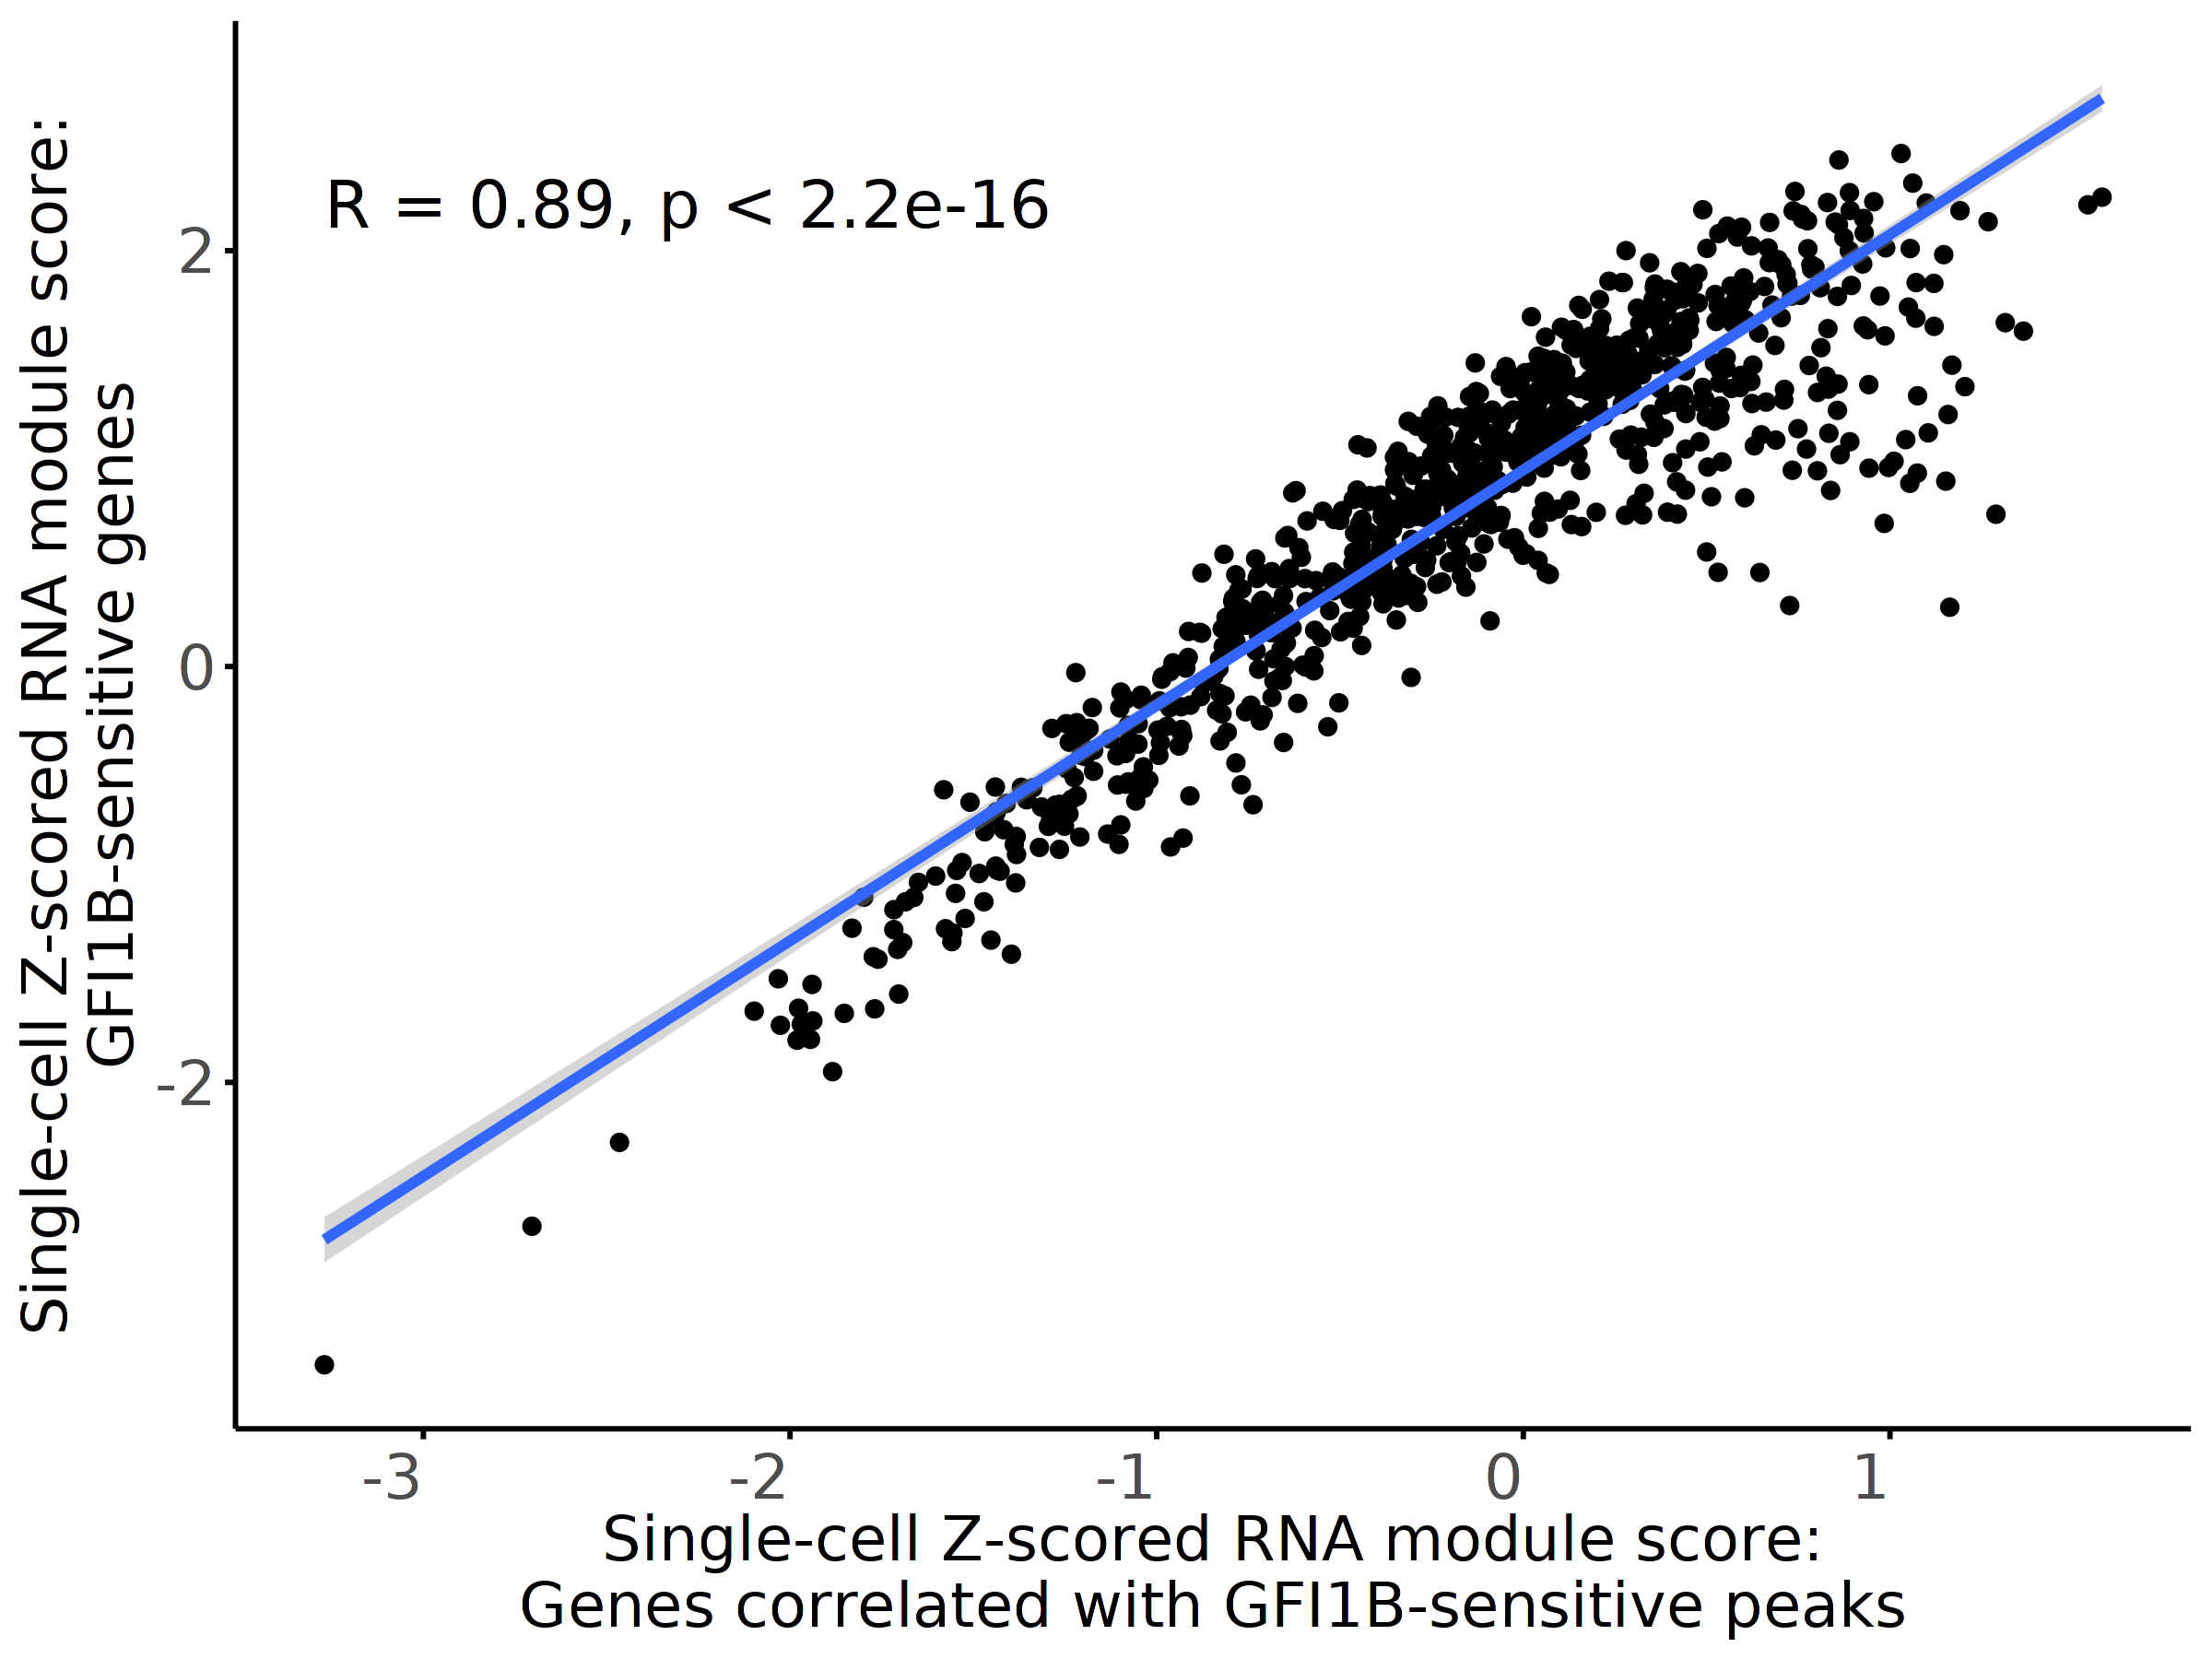

In [87]:
library(viridis)
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 300)

width=8
height=6
options(repr.plot.width = width, repr.plot.height = height, repr.plot.res = 300)
figure_name='JAN_028_GFI1B_RNA_module_correlation_ATAC_correlated_genes_v2.pdf'


ggplot(JAN_028_wnn_with_module_GFI1B_cells_only@meta.data%>%
filter(gene == 'GFI1B') %>%
       filter(mixscale_zscored_for_GFI1B_cells > 1),aes(zscored_correlated_RNA_from_sig_ATAC_GFI1B1,zscored_sig_RNA_GFI1B1))+geom_point()+ # Add points
        geom_smooth(method = "lm", se = TRUE) + # Add linear regression line without standard error
        stat_cor(method = "spearman",size=6) +
  theme_minimal() +
  theme(axis.ticks= element_line(color = "black"),
    text = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text.x = element_text(angle = 0, hjust = 1, vjust = 0.5, size = 16),
    axis.text.y = element_text(size = 16),
    panel.background = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.line = element_line(color = "black"),
    strip.text = element_text(size = 16),
    strip.background = element_blank()
  )+xlab("Single-cell Z-scored RNA module score:\nGenes correlated with GFI1B-sensitive peaks") +
ylab("Single-cell Z-scored RNA module score:\nGFI1B-sensitive genes")+ scale_color_viridis(name = "Perturbation score")

ggsave(paste(output_folder,figure_name,sep=""),dpi = 600, width = width, height = height)


# Figure 2B and 2C: correlation between replicates

Importing the other replicate's TF-sensitive elements from the Perturb-multiome in a different donor and with different sgRNAs. For RNA:

In [88]:
setwd("~/JAN_018/mixscale_analysis_RNA/") 

files <- list.files(pattern = "_results\\.RDS$")

read_and_append_filename <- function(filename) {
  df <- readRDS(filename)
  df=df[[1]]
  base_name <- tools::file_path_sans_ext(gsub("_mixscale_results", "", basename(filename)))
  
  df$perturbation_name <- base_name

  return(df)
}

combined_DAP_JAN_018_RNA <- do.call(rbind, lapply(files, read_and_append_filename))

In [90]:
combined_DAP_JAN_018_RNA_GFI1B=combined_DAP_JAN_018_RNA %>%
filter(perturbation_name == 'GFI1B')

In [92]:
combined_DAP_JAN_018_028_RNA_GFI1B=merge(combined_DAP_JAN_018_RNA_GFI1B,combined_DAP_JAN_028_RNA_GFI1B,
      by='gene_ID')

In [101]:
combined_DAP_JAN_018_028_RNA_GFI1B=combined_DAP_JAN_018_028_RNA_GFI1B %>%
mutate(zscore_log2FC.x=(log2FC.x-mean(log2FC.x))/sd(log2FC.x))%>%
mutate(zscore_log2FC.y=(log2FC.y-mean(log2FC.y))/sd(log2FC.y))

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


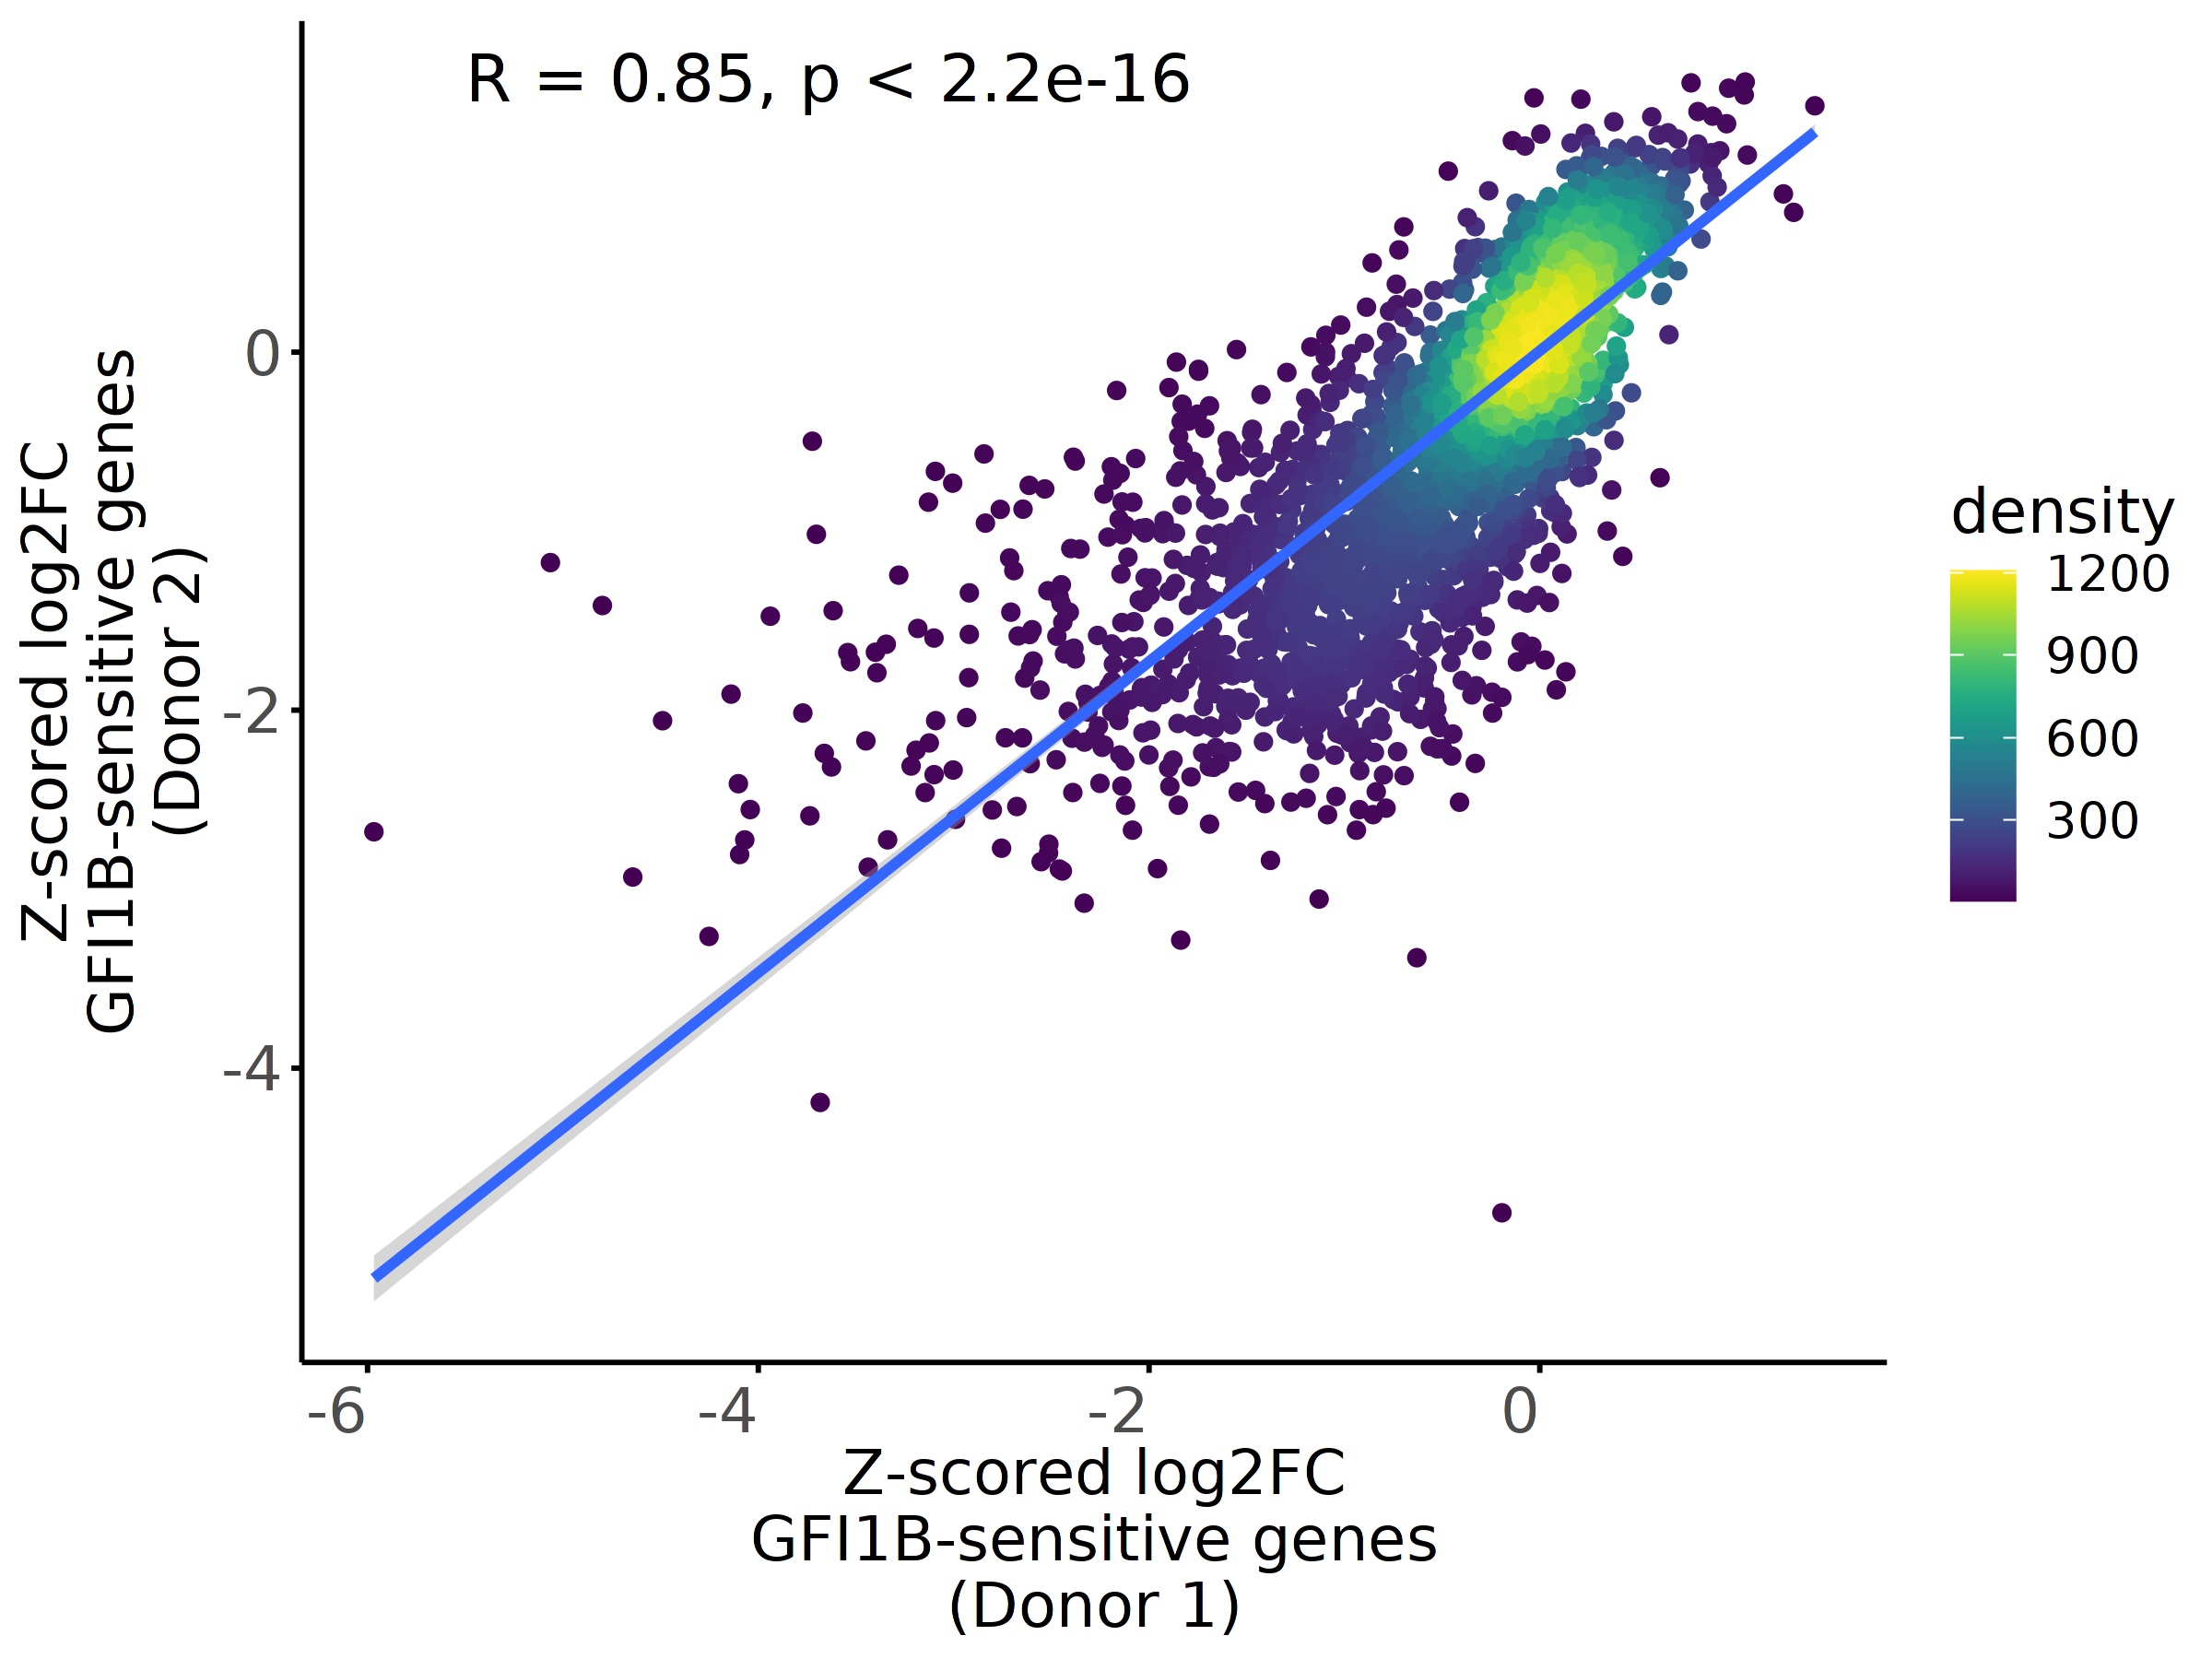

In [105]:
library(viridis)

width=8
height=6
options(repr.plot.width = width, repr.plot.height = height, repr.plot.res = 300)
figure_name='JAN_028_018_RNA_GFI1B_module_correlation_v2.pdf'

ggplot(combined_DAP_JAN_018_028_RNA_GFI1B %>%
       filter(p_weight.x < 1.67*10^-6)%>%
       filter(p_weight.y < 1.67*10^-6),
       aes(-zscore_log2FC.x,zscore_log2FC.y))+geom_pointdensity() + scale_color_viridis()+stat_cor(method = "spearman", label.x = -5.5, label.y = 1.5,
                                                             size=6)+
        geom_smooth(method = "lm", se = TRUE) + # Add linear regression line without standard error

  theme_minimal() +
  theme(axis.ticks= element_line(color = "black"),

    text = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text.x = element_text(angle = 0, hjust = 1, vjust = 0.5, size = 16),
    axis.text.y = element_text(size = 16),
    panel.background = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.line = element_line(color = "black"),
    strip.text = element_text(size = 16),
    strip.background = element_blank()
  )+xlab("Z-scored log2FC\nGFI1B-sensitive genes\n(Donor 1)") +
ylab("Z-scored log2FC\nGFI1B-sensitive genes\n(Donor 2)")

ggsave(paste(output_folder,figure_name,sep=""),dpi = 600, width = width, height = height)


Now for ATAC:

In [ ]:
setwd("~/JAN_018/mixscale_analysis_ATAC/")

files <- list.files(pattern = "_results\\.RDS$")

read_and_append_filename <- function(filename) {
  df <- readRDS(filename)
  df=df[[1]]
  base_name <- tools::file_path_sans_ext(gsub("_results", "", basename(filename)))
  df$perturbation_name <- base_name
  return(df)
}

combined_DAP_JAN_018 <- do.call(rbind, lapply(files, read_and_append_filename))

In [6]:
combined_DAP_JAN_018_ATAC=combined_DAP_JAN_018_ATAC %>%
filter(perturbation_name != '')

In [8]:
combined_DAP_JAN_018_ATAC_GFI1B=combined_DAP_JAN_018_ATAC %>%
filter(perturbation_name == 'GFI1B_248')

In [7]:
combined_DAP_JAN_028_ATAC_GFI1B=combined_DAP_JAN_028_ATAC %>%
filter(perturbation_name == 'GFI1B')

In [11]:
combined_DAP_JAN_018_028_ATAC_GFI1B=merge(combined_DAP_JAN_018_ATAC_GFI1B,combined_DAP_JAN_028_ATAC_GFI1B,
      by.x='gene_ID',by.y='gene_ID')



In [12]:
combined_DAP_JAN_018_028_ATAC_GFI1B=combined_DAP_JAN_018_028_ATAC_GFI1B %>%
mutate(zscore_log2FC.x=(log2FC.x-mean(log2FC.x))/sd(log2FC.x))%>%
mutate(zscore_log2FC.y=(log2FC.y-mean(log2FC.y))/sd(log2FC.y))

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


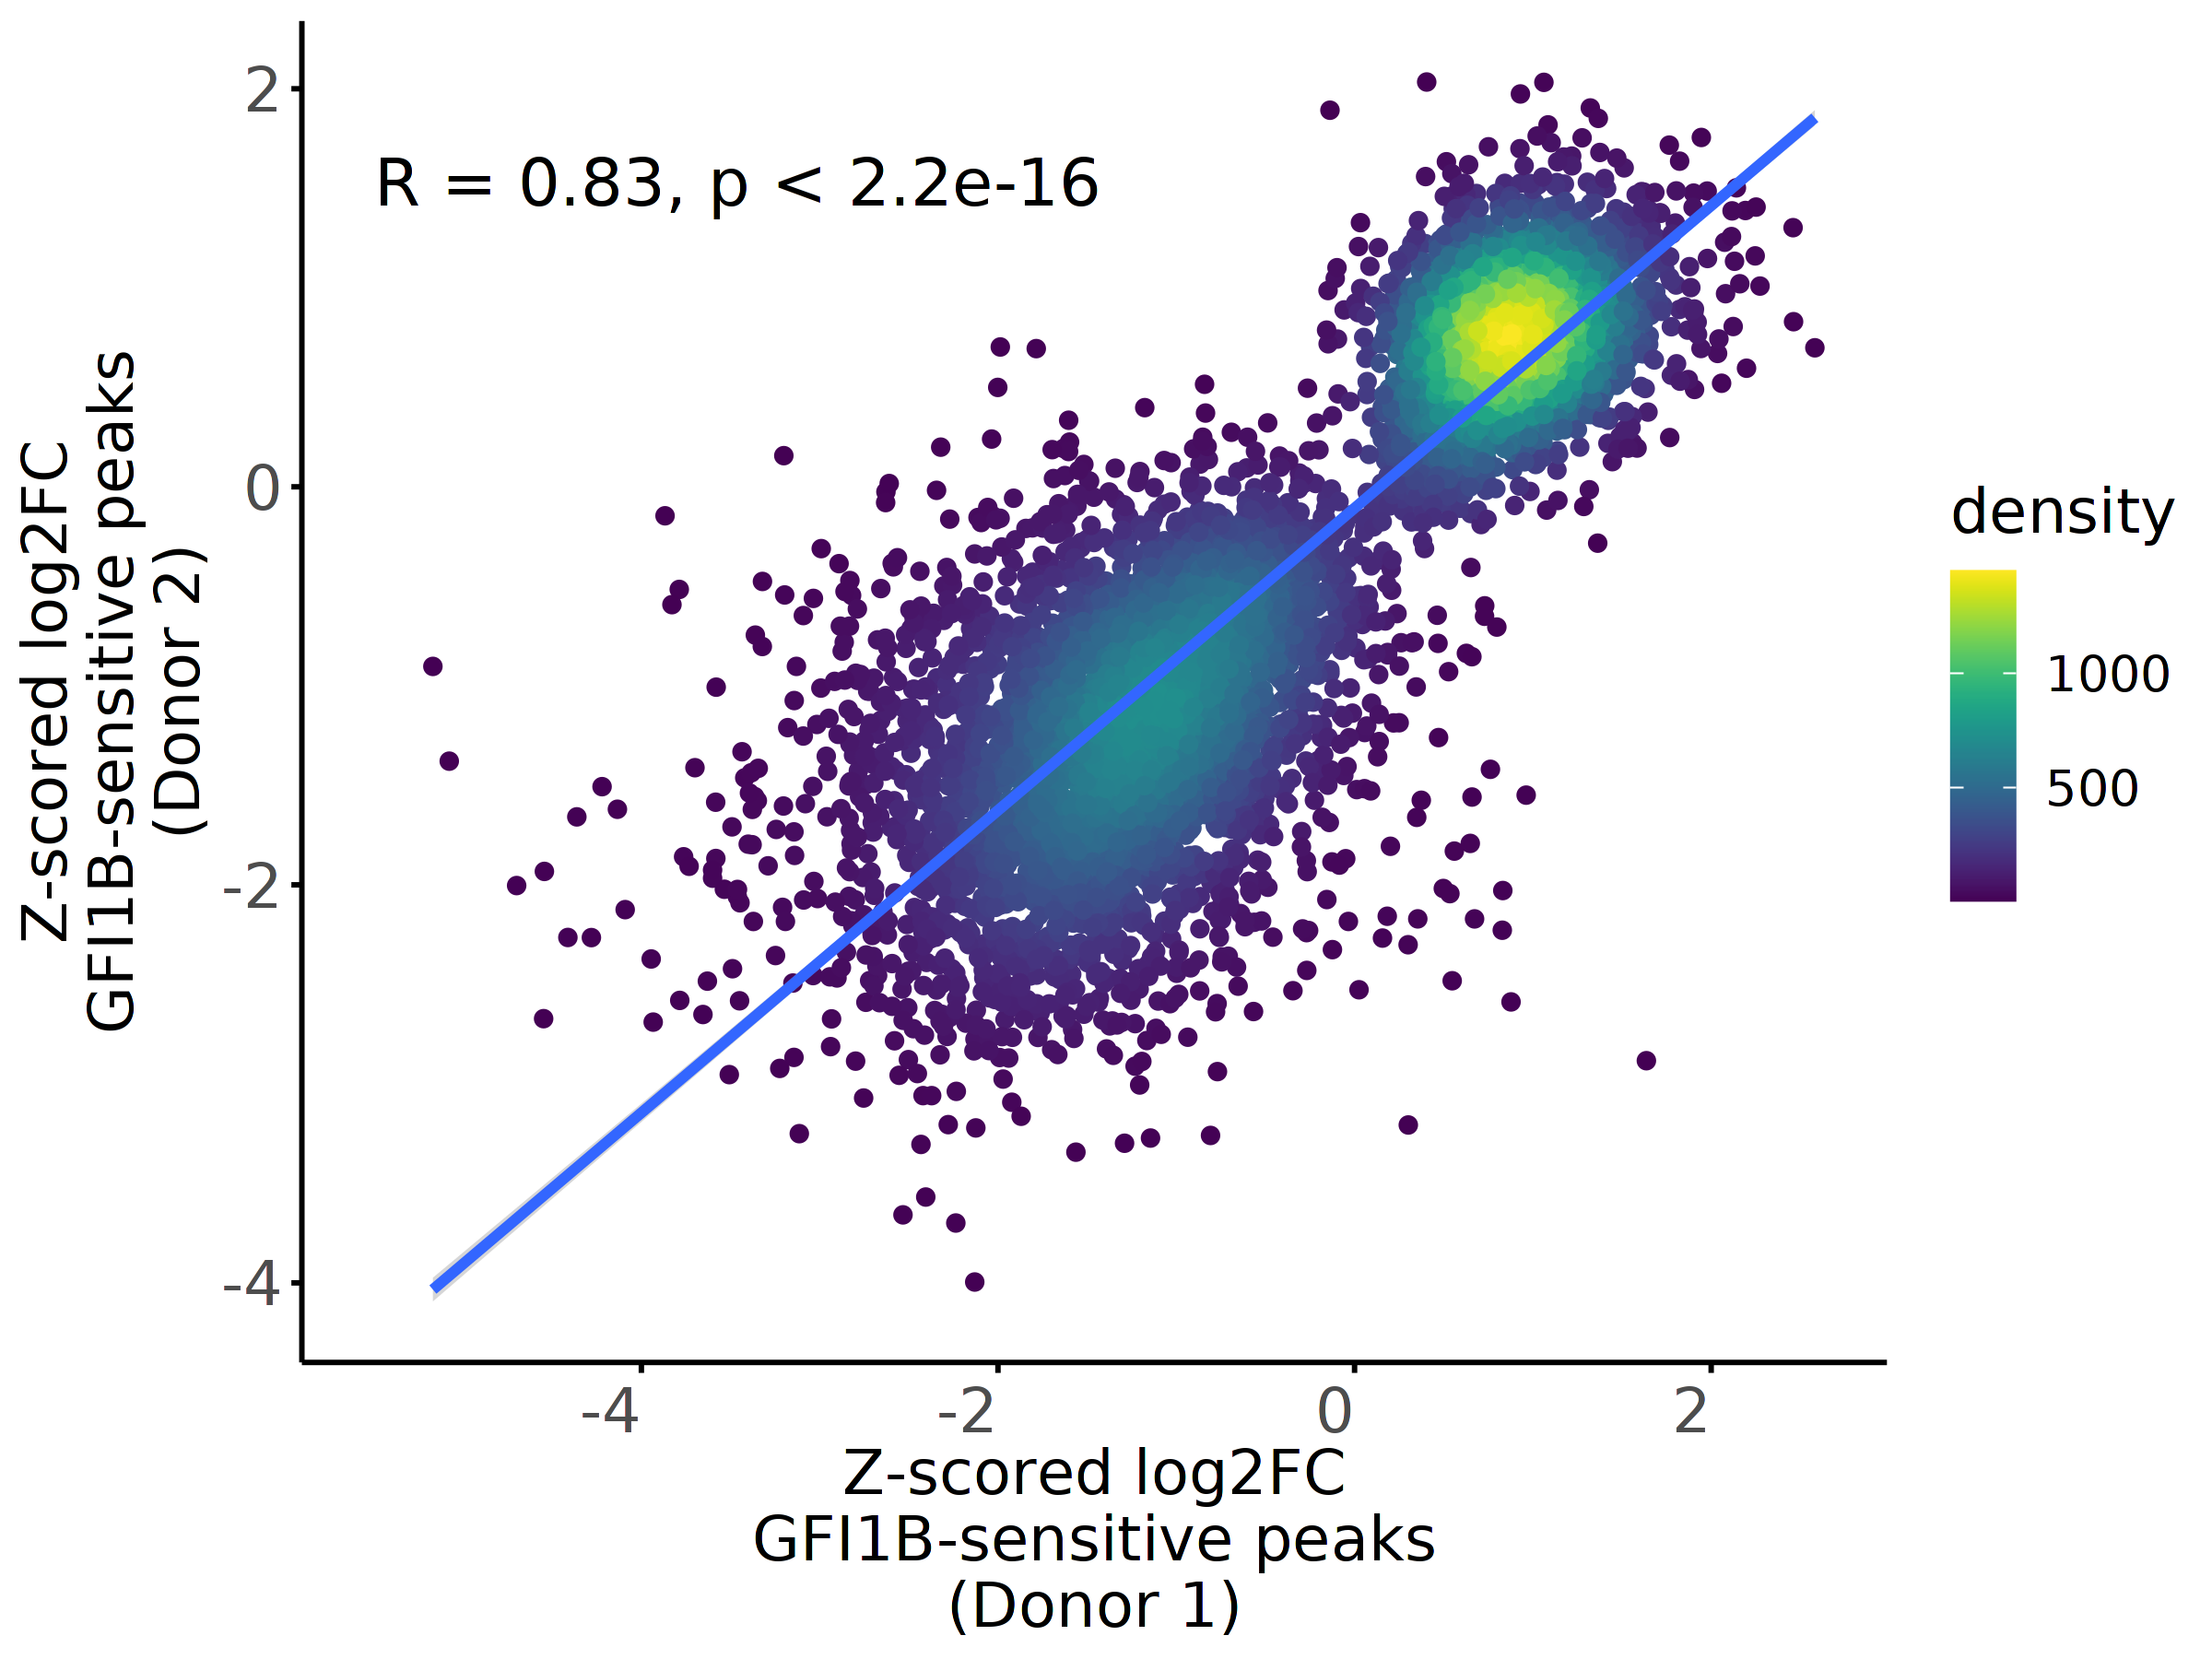

In [19]:
library(viridis)

width=8
height=6
options(repr.plot.width = width, repr.plot.height = height, repr.plot.res = 300)
figure_name='JAN_028_018_ATAC_GFI1B_module_correlation_v2.pdf'

ggplot(combined_DAP_JAN_018_028_ATAC_GFI1B %>%
       filter(p_weight.x < 0.05/230000)%>%
       filter(p_weight.y < 0.05/230000),
       aes(zscore_log2FC.x,zscore_log2FC.y))+geom_pointdensity() + stat_cor(method = "spearman", label.x = -5.5, label.y = 1.5,
                                                             size=6)+
        geom_smooth(method = "lm", se = TRUE) +
scale_color_viridis()+# Add linear regression line without standard error

  theme_minimal() +
  theme(axis.ticks= element_line(color = "black"),

    text = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text.x = element_text(angle = 0, hjust = 1, vjust = 0.5, size = 16),
    axis.text.y = element_text(size = 16),
    panel.background = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.line = element_line(color = "black"),
    strip.text = element_text(size = 16),
    strip.background = element_blank()
  )+xlab("Z-scored log2FC\nGFI1B-sensitive peaks\n(Donor 1)") +
ylab("Z-scored log2FC\nGFI1B-sensitive peaks\n(Donor 2)")





ggsave(paste(output_folder,figure_name,sep=""),dpi = 600, width = width, height = height)

